The task: *Retrain the bear classifier using multi-label classification. See if you can make it work effectively with images that don't contain any bears, including showing that information in the web application. Try an image with two different kinds of bears. Check whether the accuracy on the single-label dataset is impacted using multi-label classification.*

In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
import webp

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '408762e18eed4d68a62811a8a32e5c12')

In [4]:
bear_types = 'grizzly','black','polar','teddy','grizzly teddy','polar teddy'
path = Path('bears')

In [5]:
not_bears = 'forest','trees','glacier','kids play room'

In [6]:
def search_images_bing(key, term, max_images: int = 100, **kwargs):
    if type(term) == str:
        params = {'q':term, 'count':max_images}
        headers = {"Ocp-Apim-Subscription-Key":key}
        search_url = "https://api.bing.microsoft.com/v7.0/images/search"
        response = requests.get(search_url, headers=headers, params=params)
        response.raise_for_status()
        search_results = response.json()
        return L(search_results['value'])
    else:
        search_results = L()
        for t in term:
            params = {'q':t, 'count':max_images}
            headers = {"Ocp-Apim-Subscription-Key":key}
            search_url = "https://api.bing.microsoft.com/v7.0/images/search"
            response = requests.get(search_url, headers=headers, params=params)
            response.raise_for_status()
            search_result = response.json()
            search_results += L(search_result['value'])
    return search_results

In [7]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        if ' ' in o:
            dest = (path/"_".join(o.split(" ")))
        else:
            dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
dest = (path/"notbear")
dest.mkdir(exist_ok=True)
results = search_images_bing(key, not_bears)
download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)

In [10]:
failed = verify_images(fns)

/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


In [11]:
failed

(#34) [Path('bears/grizzly_teddy/00000067.jpg'),Path('bears/grizzly_teddy/00000012.jpg'),Path('bears/grizzly_teddy/00000060.jpg'),Path('bears/grizzly_teddy/00000070.jpg'),Path('bears/polar_teddy/00000090.jpg'),Path('bears/polar_teddy/00000093.jpg'),Path('bears/polar_teddy/00000018.jpg'),Path('bears/polar_teddy/00000094.jpg'),Path('bears/polar_teddy/00000010.jpg'),Path('bears/polar/00000081.jpg')...]

In [12]:
failed.map(Path.unlink);

In [13]:
def get_y(x):
    return str(x.parent).split("/")[-1].split('_')

In [14]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_items=get_image_files,
                  get_y=get_y,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  item_tfms=Resize(256))

In [15]:
dls = dblock.dataloaders(path)

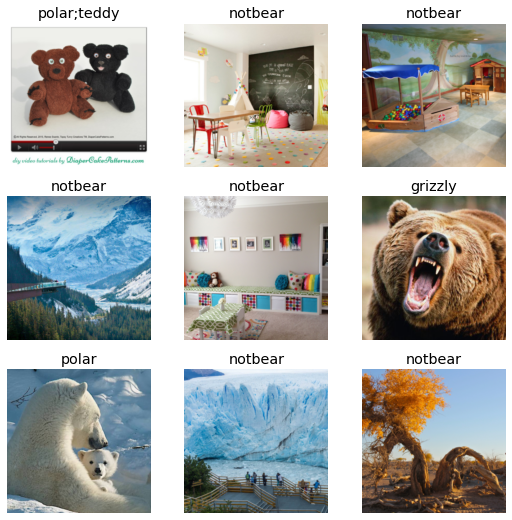

In [16]:
dls.show_batch()

In [17]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/user/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.0004786300996784121)

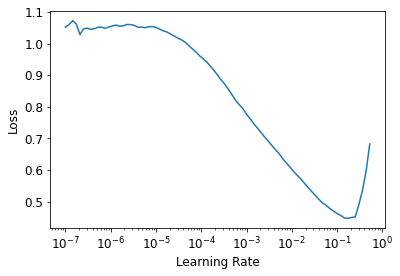

In [18]:
learn.lr_find()

In [19]:
learn.fine_tune(6, base_lr=0.017378, freeze_epochs=6)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.430179,0.226969,0.842932,00:15
1,0.295000,0.148284,0.943455,00:15
2,0.212444,0.114647,0.959162,00:15
3,0.159126,0.085591,0.972775,00:15
4,0.123356,0.089526,0.971728,00:15
5,0.103805,0.052327,0.978010,00:16


/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.056290,0.183738,0.958115,00:16
1,0.095130,3.261216,0.804188,00:15
2,0.109342,0.752987,0.945550,00:16
3,0.091183,0.113036,0.975916,00:15
4,0.077131,0.077786,0.976963,00:16
5,0.063423,0.070526,0.978010,00:17


/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3

In [20]:
learn.save("12epochs")

Path('models/12epochs.pth')

/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=1.0964781722577754e-06)

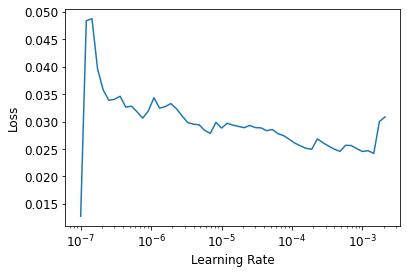

In [21]:
learn.lr_find()

In [22]:
learn.fit(2, lr=0.00014454)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.021766,0.058982,0.983246,00:16
1,0.018943,0.051576,0.983246,00:15


/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/user/anaconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


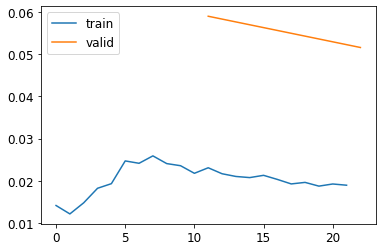

In [24]:
learn.recorder.plot_loss(skip_start=0)

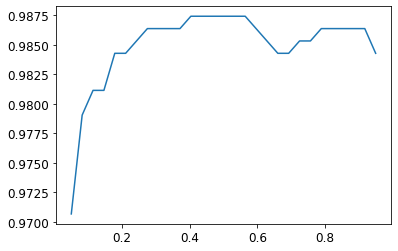

In [25]:
preds,targs = learn.get_preds()
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [26]:
learn.export()

In [27]:
learn_inf = load_learner('export.pkl')

In [49]:
out_pl = widgets.Output()
out_pl.clear_output()

In [50]:
btn_run = widgets.Button(description='Classify')

In [59]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    if len(pred) > 0:
        lbl_pred.value = f'Prediction: {" ".join(pred)}'
    else:
        lbl_pred.value = "Not a grizzly, black bear or teddy bear"

btn_run.on_click(on_click_classify)

In [52]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [55]:
img = PILImage.create(btn_upload.data[-1])
pred,pred_idx,probs = learn_inf.predict(img)

In [56]:
pred,pred_idx,probs

((#2) ['grizzly','teddy'],
 tensor([False,  True, False, False,  True]),
 tensor([1.6106e-04, 9.9841e-01, 3.3981e-05, 5.9882e-04, 9.8068e-01]))

In [57]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}'

In [60]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])